In [2]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
Saltest=pd.read_csv("D:\\ExcelR Assignments\\SVM\\SalaryData_Test(1).csv")
Saltest.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


(array([11360.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3700.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

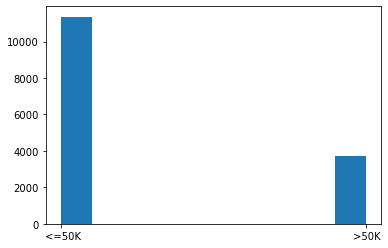

In [7]:
plt.hist(Saltest.Salary)

<AxesSubplot:xlabel='workclass'>

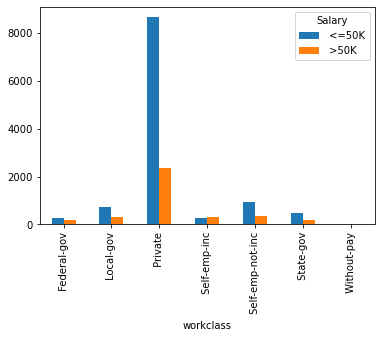

In [4]:
pd.crosstab(Saltest.workclass,Saltest.Salary).plot(kind="bar")

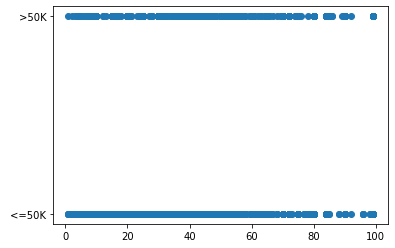

In [8]:
plt.scatter(Saltest.hoursperweek,Saltest.Salary)

In [5]:
Saltrain=pd.read_csv("D:\\ExcelR Assignments\\SVM\\SalaryData_Train(1).csv")
Saltrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:xlabel='occupation'>

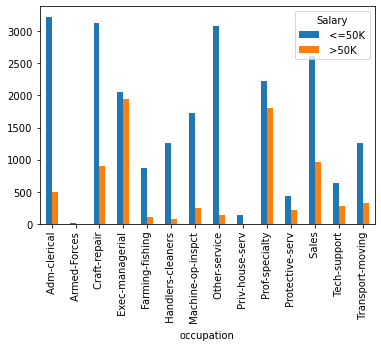

In [9]:
pd.crosstab(Saltrain.occupation,Saltrain.Salary).plot(kind="bar")

<AxesSubplot:xlabel='workclass'>

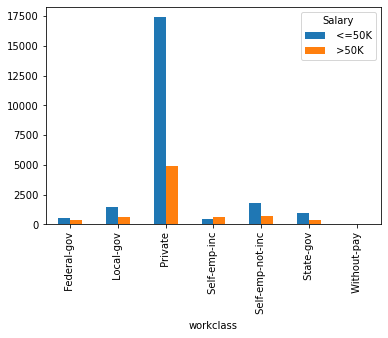

In [6]:
pd.crosstab(Saltrain.workclass,Saltrain.Salary).plot(kind="bar")

In [5]:
Saltest=Saltest.apply(LabelEncoder().fit_transform)
Saltest.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


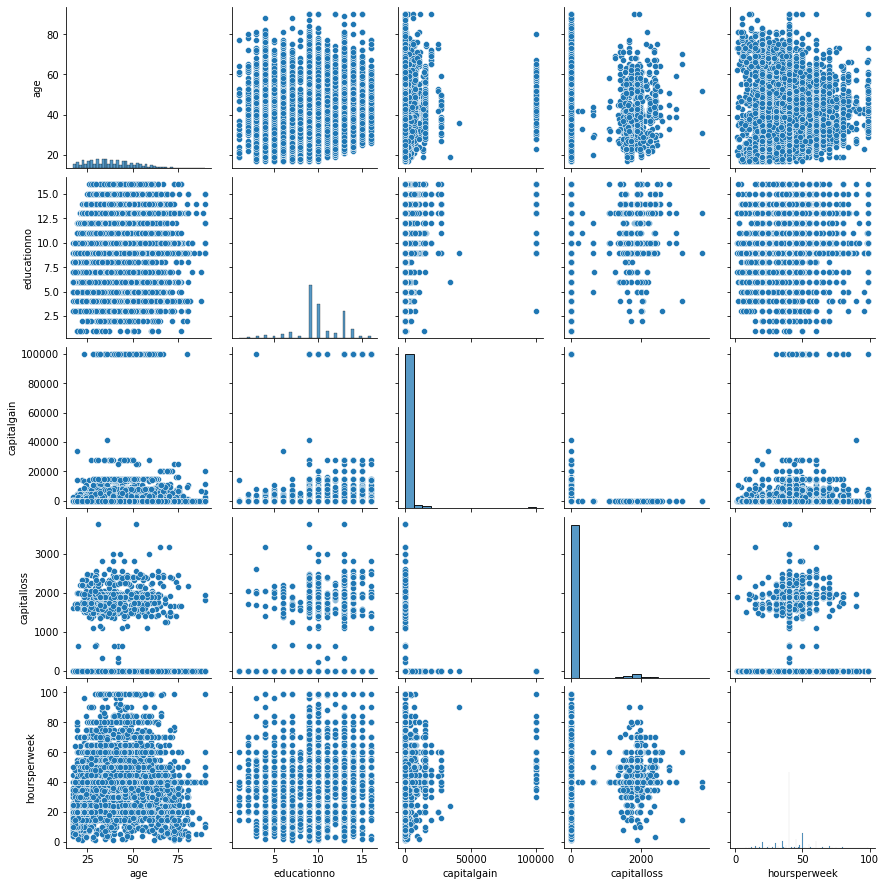

In [12]:
import seaborn as sns
sns.pairplot(Saltest.dropna());

In [6]:
Saltrain=Saltrain.apply(LabelEncoder().fit_transform)
Saltrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [7]:
X_train=Saltrain.drop(['age','maritalstatus','relationship','race','sex','native'],axis=1).values
X_train

array([[ 5,  9, 12, ...,  0, 39,  0],
       [ 4,  9, 12, ...,  0, 12,  0],
       [ 2, 11,  8, ...,  0, 39,  0],
       ...,
       [ 2, 11,  8, ...,  0, 39,  0],
       [ 2, 11,  8, ...,  0, 19,  0],
       [ 3, 11,  8, ...,  0, 39,  1]], dtype=int64)

In [8]:
Y_train=Saltrain["Salary"].values
Y_train

array([0, 0, 0, ..., 0, 0, 1])

In [9]:
X_test=Saltest.drop(['age','maritalstatus','relationship','race','sex','native'],axis=1).values
X_test

array([[ 2,  1,  6, ...,  0, 39,  0],
       [ 2, 11,  8, ...,  0, 49,  0],
       [ 1,  7, 11, ...,  0, 39,  1],
       ...,
       [ 2,  9, 12, ...,  0, 49,  0],
       [ 2,  9, 12, ...,  0, 39,  0],
       [ 3,  9, 12, ...,  0, 59,  1]], dtype=int64)

In [10]:
Y_test=Saltest["Salary"].values
Y_test

array([0, 0, 1, ..., 0, 0, 1])

In [11]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((30161, 8), (30161,), (15060, 8), (15060,))

In [12]:
#Gamma=0.22

In [13]:
svc = SVC(gamma= 0.22)
svc.fit(X_train, Y_train)
score_svc = svc.score(X_test, Y_test)
print("The accuracy of SVC is ", score_svc)

The accuracy of SVC is  0.9328021248339974


In [14]:
#Gamma=0.33

In [15]:
svc = SVC(gamma=0.33)
svc.fit(X_train, Y_train)
score_svc = svc.score(X_test, Y_test)
print('the accuracy of SVC is', score_svc)

the accuracy of SVC is 0.9252988047808764


In [16]:
svc_radical = svm.SVC(kernel='poly', C=1, gamma=0.33)
svc_radical.fit(X_train,Y_train)
score_svc_radical = svc_radical.score(X_test, Y_test)
print('The accuracy of poly SVC model is ', score_svc_radical)

The accuracy of poly SVC model is  0.999734395750332


In [17]:
clf = SVC(kernel='poly', C=1, gamma=0.33)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) *100
print('Accuracy=', acc)
confusion_matrix(Y_test, y_pred)

Accuracy= 99.9734395750332


array([[11359,     1],
       [    3,  3697]], dtype=int64)

In [18]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

    accuracy                           1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060

